### Califonia Housing Prices Prediction

In [4]:
#importing data
df = pd.read_csv('housing.csv')
df.head()

<IPython.core.display.Javascript object>

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


### Checking for missing values 

In [12]:
#cheking for null values 
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

* from the dataset it shows that we only have one column with missing values
* Column name is Total Bedrooms 

### Checcking data types for the columns 

In [16]:
#checking dataset info which includes missing values and data types 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


* from the dataset info it shows that we 10 coulmns and 20640 entries except the total_bedrooms column were there are missing values  

In [25]:
# Summary statistics for nemerical data in the dataset 
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [27]:
#checking the column with missing values 
df['total_bedrooms'].sample(10)

7960      503.0
3236      327.0
2143      947.0
6782      236.0
19664     285.0
10379    1512.0
3232      349.0
14389     404.0
14670     631.0
5864      633.0
Name: total_bedrooms, dtype: float64

In [35]:
#calculate the median for that column and fill null values 
median = df['total_bedrooms'].median()
#filling missing values using the mean
df['total_bedrooms'] = df['total_bedrooms'].fillna(median)
#checking for missing values 
df.isna().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

### Plotting number of households vs total bedrooms

<Axes: xlabel='total_bedrooms', ylabel='households'>

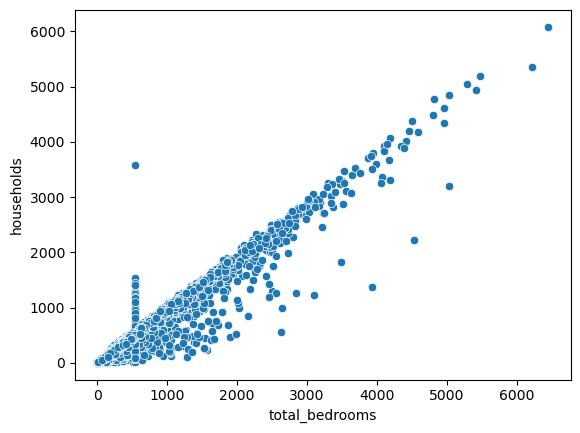

In [42]:
# scatterplot for correlatin between households and total_bedrooms 
import seaborn as sns
sns.scatterplot(x='total_bedrooms',y = 'households',data=df)

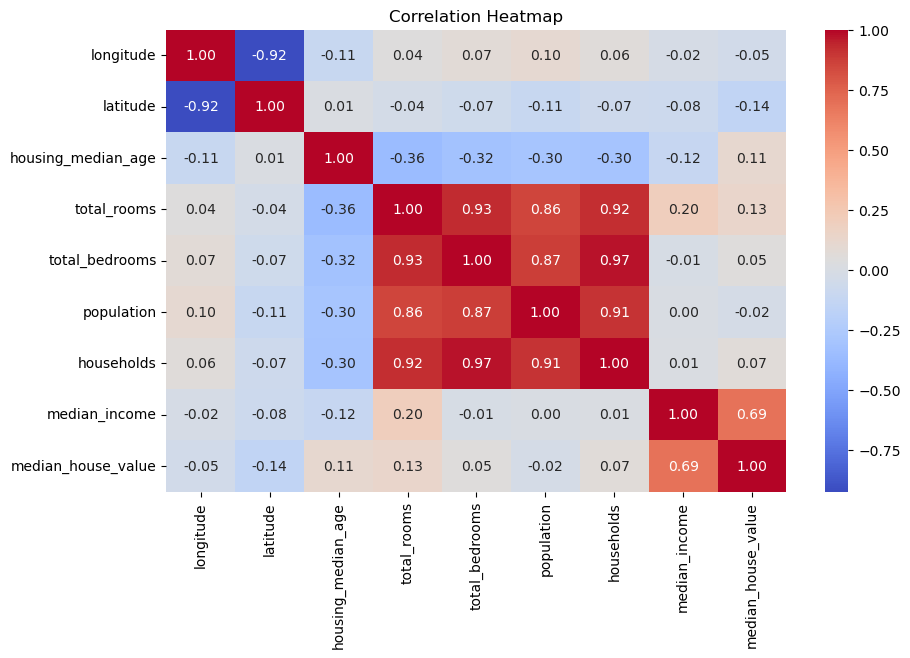

In [50]:
#importing matplotlib
import matplotlib.pyplot as plt
#drop categorical column
df1 = df.drop('ocean_proximity',axis=1)
#plotting a heatmap to see correlation within our dataset 
plt.figure(figsize =(10,6))
sns.heatmap(df1.corr(),annot = True,cmap ='coolwarm',fmt = ".2f")
plt.title('Correlation Heatmap')
plt.show()

* from the heatmap it shows that there is multiicolineality
* total_rooms, total_bedrooms, population, and households are redundant, using all of them may confuse some models
* Feature engineering will be necessary for the columns that are redundant
* Create ratios such as:

   - rooms_per_household

    - bedrooms_per_room

    - population_per_household

#### Feature Engineering

In [198]:
df['rooms_per_household'] = df['total_bedrooms']/df['households']
df['bedrooms_per_room'] = df['total_bedrooms']/df['total_rooms']
df['population_per_household'] =df['population']/df['households']
df2 = df.drop(['total_bedrooms','population','households','total_rooms'],axis = 1)
df2.head()

,longitude,latitude,housing_median_age,median_income,median_house_value,ocean_proximity,rooms_per_household,bedrooms_per_room,population_per_household
0,-122.23,37.88,41.0,8.3252,452600.0,NEAR BAY,1.023810,0.146591,2.555556
1,-122.22,37.86,21.0,8.3014,358500.0,NEAR BAY,0.971880,0.155797,2.109842
2,-122.24,37.85,52.0,7.2574,352100.0,NEAR BAY,1.073446,0.129516,2.802260
3,-122.25,37.85,52.0,5.6431,341300.0,NEAR BAY,1.073059,0.184458,2.547945
4,-122.25,37.85,52.0,3.8462,342200.0,NEAR BAY,1.081081,0.172096,2.181467


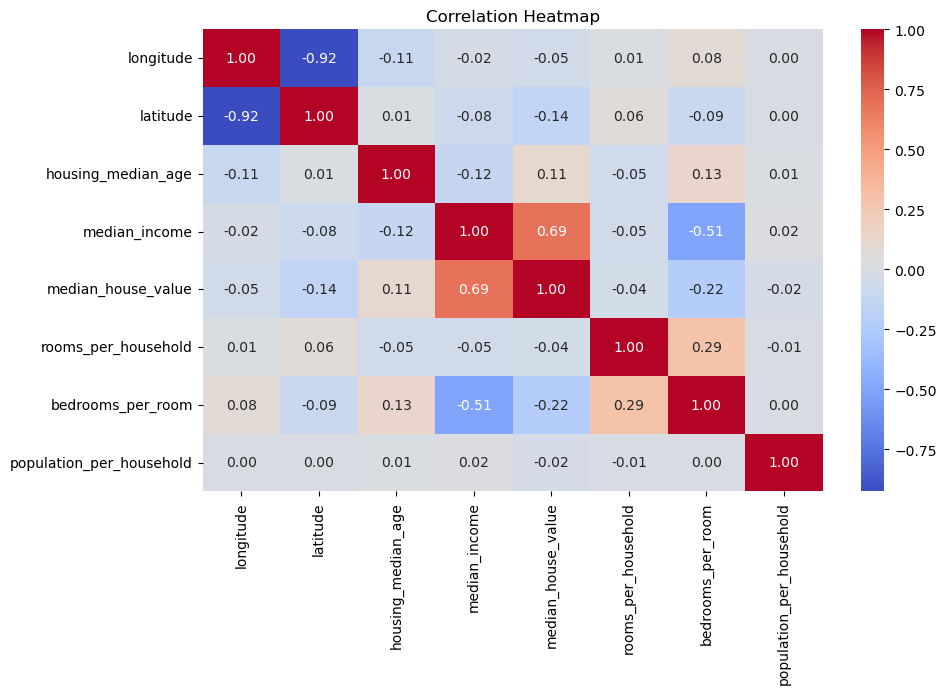

In [200]:
df3 = df2.drop('ocean_proximity',axis=1)
#plotting a heatmap to see correlation within our dataset 
plt.figure(figsize =(10,6))
sns.heatmap(df3.corr(),annot = True,cmap ='coolwarm',fmt = ".2f")
plt.title('Correlation Heatmap')
plt.show()

In [202]:
df2[['ocean_proximity']].value_counts()

ocean_proximity
<1H OCEAN          9136
INLAND             6551
NEAR OCEAN         2658
NEAR BAY           2290
ISLAND                5
Name: count, dtype: int64

### Dealing with the categorical column 

In [204]:
#ocean proximity column is a categorical column 
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(sparse_output=False, drop='first')
encoded = encoder.fit_transform(df2[['ocean_proximity']])

# Create dataframe with new column names
encoded_df = pd.DataFrame(encoded, columns=encoder.get_feature_names_out(['ocean_proximity']))

# Concatenate back to original dataframe (dropping the old column)
df_encoded = pd.concat([df2.drop('ocean_proximity', axis=1), encoded_df], axis=1)
df_encoded.head()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,longitude,latitude,housing_median_age,median_income,median_house_value,rooms_per_household,bedrooms_per_room,population_per_household,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-122.23,37.88,41.0,8.3252,452600.0,1.023810,0.146591,2.555556,0.0,0.0,1.0,0.0
1,-122.22,37.86,21.0,8.3014,358500.0,0.971880,0.155797,2.109842,0.0,0.0,1.0,0.0
2,-122.24,37.85,52.0,7.2574,352100.0,1.073446,0.129516,2.802260,0.0,0.0,1.0,0.0
3,-122.25,37.85,52.0,5.6431,341300.0,1.073059,0.184458,2.547945,0.0,0.0,1.0,0.0
4,-122.25,37.85,52.0,3.8462,342200.0,1.081081,0.172096,2.181467,0.0,0.0,1.0,0.0


In [206]:
#dropping longitude and latitude
df_encoded.drop(['longitude','latitude'],axis = 1,inplace = True)

In [208]:
X = df_encoded.drop('median_house_value',axis = 1)
y = df_encoded.median_house_value

In [210]:
print(y.shape)

(20640,)


### Splitting data into training and testing sets

In [212]:
#splitting using train_test_split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state = 42,
                                                 test_size = 0.2)
                                                

In [214]:
print(X_train.shape,y_train.shape)

(16512, 9) (16512,)


### Scaling using Standard scaler

In [216]:
# Scaling the features using standard scaler
from sklearn.preprocessing import  StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Model Training and Evaluation

In [218]:
#importing libraries for model training and evaluation
import numpy as np
import joblib
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor


In [220]:
#Define regression models
models = {
    "Decision Tree": DecisionTreeRegressor(),
    "SVM": SVR(),
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(),
    "XGBoost": XGBRegressor(objective="reg:squarederror", random_state=42),
    "LightGBM": LGBMRegressor(random_state=42)
}

In [222]:
#Compare models with cross-validation (R² score)
results = {}
print("🔎 Model Evaluation Results:\n")
for name, model in models.items():
    scores = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring="r2")
    mean_score = np.mean(scores)
    results[name] = mean_score
    print(f"{name}: Mean R² = {mean_score:.3f}")

🔎 Model Evaluation Results:

Decision Tree: Mean R² = 0.490
SVM: Mean R² = -0.046
Linear Regression: Mean R² = 0.614
Random Forest: Mean R² = 0.731
XGBoost: Mean R² = 0.721
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000830 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1082
[LightGBM] [Info] Number of data points in the train set: 13209, number of used features: 8
[LightGBM] [Info] Start training from score 206743.221289
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001169 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1081
[LightGBM] [Info] Number of data points in the train set: 13209, number of used features: 8
[LightGBM] [Info] Start training from score 207099.730033
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001116 seconds.
You can set `force_col_wise=tru

In [224]:
# Pick best model
best_model_name = max(results, key=results.get)
print("\n✅ Best Model Selected:", best_model_name)



✅ Best Model Selected: LightGBM


In [226]:
# 4. Hyperparameter grids
param_grids = {
    "Decision Tree": {
        "max_depth": [3, 5, 10, None],
        "criterion": ["squared_error", "friedman_mse"]
    },
    "SVM": {
        "C": [0.1, 1, 10],
        "kernel": ["linear", "rbf"],
        "gamma": ["scale", "auto"]
    },
    "Linear Regression": {}, 
    "Random Forest": {
        "n_estimators": [100, 200],
        "max_depth": [5, 10, None]
    },
    "XGBoost": {
        "n_estimators": [100, 200],
        "max_depth": [3, 5, 7],
        "learning_rate": [0.01, 0.1, 0.3]
    },
    "LightGBM": {
        "n_estimators": [100, 200],
        "max_depth": [-1, 5, 10],
        "learning_rate": [0.01, 0.1, 0.3]
    }
}


In [228]:
#  Hyperparameter tuning
print("\n⚙️ Hyperparameter Tuning in progress...")
grid = GridSearchCV(
    estimator=models[best_model_name],
    param_grid=param_grids.get(best_model_name, {}),
    cv=5,
    n_jobs=-1,
    scoring="r2"
)


⚙️ Hyperparameter Tuning in progress...


In [230]:
grid.fit(X_train_scaled, y_train)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001154 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1082
[LightGBM] [Info] Number of data points in the train set: 16512, number of used features: 8
[LightGBM] [Info] Start training from score 207194.693738


GridSearchCV(cv=5, estimator=LGBMRegressor(random_state=42), n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1, 0.3],
                         'max_depth': [-1, 5, 10], 'n_estimators': [100, 200]},
             scoring='r2')

In [231]:
print(" Best Parameters:", grid.best_params_)
print(" Best CV R²:", grid.best_score_)


 Best Parameters: {'learning_rate': 0.1, 'max_depth': -1, 'n_estimators': 100}
 Best CV R²: 0.7461073600716964


In [ ]:
#Final evaluation on test set
y_pred = grid.predict(X_test_scaled)
print("\n Final Model Performance on Test Set:")
print("R² Score:", r2_score(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))


📌 Final Model Performance on Test Set:
R² Score: 0.7309000514610344
MSE: 3526309886.0962462
MAE: 41433.9254014274


In [233]:
#Save final model
joblib.dump(grid.best_estimator_, "best_regression_model.pkl")
print("\n💾 Model saved as best_regression_model.pkl")


💾 Model saved as best_regression_model.pkl


### Using the saved model on your data

In [241]:
# #load the model
# model = joblib.load("best_regression_model.pkl")
# data = pd.read_csv('BostonHousing.csv')
# prediction = model.predict(data)
# print("Predicted value:", prediction[0])